# Yolo Format Visualize

In [1]:
%matplotlib inline

import os
import random

import cv2
import matplotlib.pyplot as plt


category_id_to_name = {0: 'General trash', 1: 'Paper', 2: 'Paper pack', 3: 'Metal', 4: 'Glass', 5: 'Plastic',
    6: 'Styrofoam', 7: 'Plastic bag', 8: 'Battery', 9: 'Clothing'}

In [2]:
def yolo_to_coco(yolo_annotation_path, image_width, image_height):
    
    bboxes = []
    category_ids = []
    
    with open(yolo_annotation_path, "r") as f:
        lines = f.readlines()
        
    for line in lines:
        parts = line.strip().split()
        class_index = int(parts[0])
        x_center, y_center, box_width, box_height = map(float, parts[1:5])

        x_min = int((x_center - box_width / 2) * image_width)
        y_min = int((y_center - box_height / 2) * image_height)
        coco_width = int(box_width * image_width)
        coco_height = int(box_height * image_height)
        
        bboxes.append([x_min, y_min, coco_width, coco_height])
        category_ids.append(class_index)
        
    return bboxes, category_ids

In [3]:
BOX_COLOR = [[random.randint(0, 255) for _ in range(3)] for _ in range(10)]
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_name, color, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), color, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, BOX_COLOR[category_id])
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [4]:
num = 101

root = '../../dataset/yolo_train/'
image = f'images/{str(num).zfill(4)}.jpg'
label = f'labels/{str(num).zfill(4)}.txt'

img = cv2.imread(os.path.join(root, image), cv2.IMREAD_COLOR)
h, w, c = img.shape
bboxes, category_ids = yolo_to_coco(os.path.join(root, label), w, h)

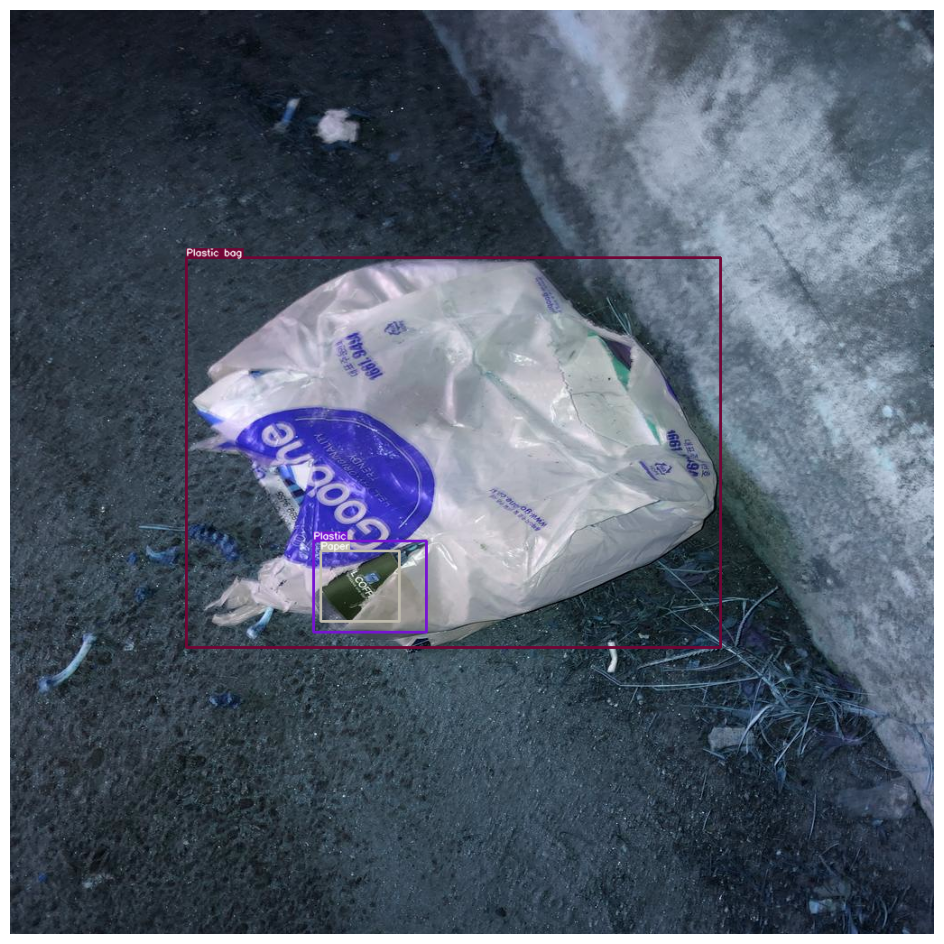

In [5]:
visualize(img, bboxes, category_ids, category_id_to_name)

# COCO Visualize

In [6]:
import json

In [7]:
file = '../../dataset/train.json'
with open(file) as f:
    data = json.load(f)

In [8]:
def get_img(filename):
    for img in data['images']:
        if img['file_name'] == 'train/'+filename:
            return img


def get_img_ann(image_id):
    img_ann = []
    isFound = False
    for ann in data['annotations']:
        if ann['image_id'] == image_id:
            img_ann.append(ann)
            isFound = True
    if isFound:
        return img_ann
    else:
        return print(image_id)

In [9]:
root = '../../dataset/train'
image = f'{str(num).zfill(4)}.jpg'

img = get_img(image)
img_id = img['id']

img_ann = get_img_ann(img_id)

if img_ann:
    for ann in img_ann:
        current_category = ann['category_id']
        current_bbox = ann['bbox']
        x = current_bbox[0]
        y = current_bbox[1]
        w = current_bbox[2]
        h = current_bbox[3]
        
        bboxes.append([x, y, w, h])

img = cv2.imread(os.path.join(root, image), cv2.IMREAD_COLOR)



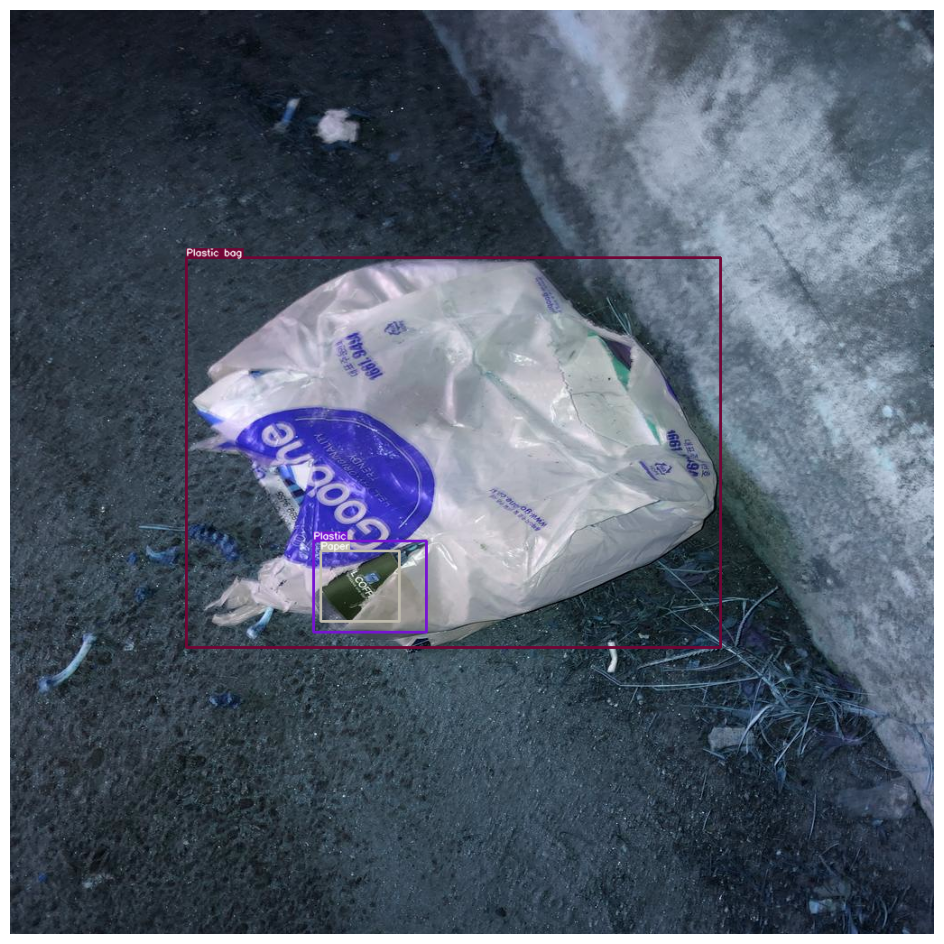

In [10]:
visualize(img, bboxes, category_ids, category_id_to_name)